In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://wunderflats.com/en/furnished-apartments/hamburg"]
for page in range(2,18):
    pages.append("https://wunderflats.com/en/furnished-apartments/hamburg/" +str (page))
    
pages

['https://wunderflats.com/en/furnished-apartments/hamburg',
 'https://wunderflats.com/en/furnished-apartments/hamburg/2',
 'https://wunderflats.com/en/furnished-apartments/hamburg/3',
 'https://wunderflats.com/en/furnished-apartments/hamburg/4',
 'https://wunderflats.com/en/furnished-apartments/hamburg/5',
 'https://wunderflats.com/en/furnished-apartments/hamburg/6',
 'https://wunderflats.com/en/furnished-apartments/hamburg/7',
 'https://wunderflats.com/en/furnished-apartments/hamburg/8',
 'https://wunderflats.com/en/furnished-apartments/hamburg/9',
 'https://wunderflats.com/en/furnished-apartments/hamburg/10',
 'https://wunderflats.com/en/furnished-apartments/hamburg/11',
 'https://wunderflats.com/en/furnished-apartments/hamburg/12',
 'https://wunderflats.com/en/furnished-apartments/hamburg/13',
 'https://wunderflats.com/en/furnished-apartments/hamburg/14',
 'https://wunderflats.com/en/furnished-apartments/hamburg/15',
 'https://wunderflats.com/en/furnished-apartments/hamburg/16',
 'h

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"Listing-link"}):
        links.append("https://wunderflats.com" + resulthf.get("href"))

links

['https://wunderflats.com/en/furnished-apartment/g/co-living-modern-room-in-a-prime-location-in-beautiful-winterhude-cleaning-included/yr0w2hWDePPxAiHiKOdyB?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa',
 'https://wunderflats.com/en/furnished-apartment/g/co-living-room-with-balcony-in-buzzing-hamburg-eppendorf-cleaning-included/e1d_p2K4gngJq5OiWlGcj?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa',
 'https://wunderflats.com/en/furnished-apartment/g/co-living-modern-room-with-private-bathroom-in-beautiful-winterhude-cleaning-included/4Z5Kd2u81OeRe1ekxGOEw?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa',
 'https://wunderflats.com/en/furnished-apartment/g/co-living-modern-room-in-a-prime-location-in-beautiful-winterhude-cleaning-included/PL4xp3IS1VyQFKDqz37Yo?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa',
 'https://wunderflats.com/en/furnished-apartment/g/co-living-modern-room-in-buzzing-hamburg-eppendorf-cleaning-included/oK-fir8Doxu-yDbTzjKQf?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa',
 'https://wunderflats.com/en/furnished-apartment/g/c

In [5]:
len(links)

493

In [6]:
ex=getAndParseURL("https://wunderflats.com/en/furnished-apartment/g/maisonette-apartment-with-balcony/6i3GA6Fe9ic-6QFo_J84J?dataLayerKey=k2xveOsPeOBkVZM_-8Gfa")

In [7]:
### For Rent Price ###
ex.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()

'4200'

In [8]:
### Net Area Of Flat###
ex.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()

'55'

In [9]:
### Location Info ###
ex.find("span",{"class":"txt-light"}).text.strip()

'Ditmar-Koel-Straße, 20459, Hamburg'

In [12]:
### Capacity ###
ex.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()

'2 People'

In [13]:
### Bedroom Number ###
ex.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()

'2'

In [14]:
### Deposit ###
ex.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()

'1789'

In [10]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"txt-light"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("strong",{"class":"ListingPriceText-value"}).text.replace("€","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.findAll("div",{"class":"CostOverview-itemRow"})[1].text.replace("Security deposit€","").replace(",","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.find("span",{"class":"ListingDetails-statsElt rooms"}).text.replace("Rooms","").strip()
    except:
        rooms = np.nan
    try:
        capacity = html.find("span",{"class":"ListingDetails-statsElt guests"}).text.strip()
    except:
        capacity = np.nan
    try:
        net_area = html.find("span",{"class":"ListingDetails-statsElt floor"}).text[0:3].strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,capacity,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Capacity","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [12]:
df.to_csv("hamburg_rental.csv")

In [11]:
df

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,"Dorotheenstraße, 22301, Hamburg",1135,2270,1 Room,1 Person,8 m
1,"Eppendorfer Weg, 20251, Hamburg",1475,2950,1 Room,1 Person,12
2,"Dorotheenstraße, 22301, Hamburg",1590,3180,1 Room,2 People,25
3,"Dorotheenstraße, 22301, Hamburg",1250,2500,1 Room,1 Person,12
4,"Eppendorfer Weg, 20251, Hamburg",1250,2500,1 Room,1 Person,10
...,...,...,...,...,...,...
488,"Klosterallee, 20144, Hamburg",5775,0,4,6 People,80
489,"Schanzenstraße, 20357, Hamburg",1200,1200,1 Room,2 People,16
490,"Steilshooper Straße, 22305, Hamburg",1439,1000,1 Room,1 Person,32
491,"Gurlittstraße, 20099, Hamburg",2940,2940,2,4 People,40


In [2]:
df=pd.read_csv("hamburg_rental.csv")

In [3]:
df.head(8)

,Unnamed: 0,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,0,"Dorotheenstraße, 22301, Hamburg",1135,2270,1 Room,1 Person,8 m
1,1,"Eppendorfer Weg, 20251, Hamburg",1475,2950,1 Room,1 Person,12
2,2,"Dorotheenstraße, 22301, Hamburg",1590,3180,1 Room,2 People,25
3,3,"Dorotheenstraße, 22301, Hamburg",1250,2500,1 Room,1 Person,12
4,4,"Eppendorfer Weg, 20251, Hamburg",1250,2500,1 Room,1 Person,10
5,5,"Eppendorfer Weg, 20251, Hamburg",1365,2730,1 Room,1 Person,10
6,6,"Dorotheenstraße, 22301, Hamburg",1365,2730,1 Room,1 Person,14
7,7,"Eppendorfer Weg, 20251, Hamburg",1475,2950,1 Room,1 Person,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  493 non-null    int64 
 1   Location    493 non-null    object
 2   Rent        493 non-null    int64 
 3   Deposit     493 non-null    int64 
 4   Rooms       493 non-null    object
 5   Capacity    493 non-null    object
 6   Net Area    493 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.1+ KB


In [5]:
df["Rent"].unique()

array([ 1135,  1475,  1590,  1250,  1365,  1690,  1400,  1600,  1780,
        4200,   980,  2945,  3500,  1290,  1295,  1249,  1350,  1200,
        2190,  2300,  1150,  1100,  1650,  1470,  1450,  1850,  3600,
        1050,   940,  2295,  1320,  1990,  1700,  1495,  1390,  2650,
        1399,  1580,  2950,  2020,  1490,  2660,  2100,  1790,  2050,
        1395,  1500,  1745,   890,   820,  3750,   695,  1880,  1180,
        2290,  1660,  2390,  2590,  2400,  1849,   995,  5850,  1299,
        2750,  1550,  3350,  4092,  1940,  1750,  2490,  1800,  1950,
        2900,  3900,  1020,  1420,  1595,  2800,  6500,  2442,  4650,
        1190,  2700,  2500,  4257,  1385,  5250,  1890,  1695,  3090,
        3630,  4090,  3102,  1370,  3000,   920,   780,  1945,  5500,
        5900,  1240,  3432,  2990,  2000,  2200,  1430,  1820,  1360,
        1149,  1060,  1900,  1560,   945,  2780,  1179,  1585,   990,
        1090,  1480,  1760,   895,  1565,  1680,  2090,  1300,   825,
        3200,  2043,

In [6]:
df["Rent"].mean()

2074.1541582150103

In [7]:
df["Deposit"].mean()

2383.574036511156

In [10]:
df["Rooms"].unique()

array(['1', '2', '4', '3', '6', '5'], dtype=object)

In [9]:
df["Rooms"]=df["Rooms"].apply(lambda x : "1" if x =="1 Room" else x)

In [11]:
df["Rooms"]=df["Rooms"].astype(int)

In [19]:
df["Net Area"].unique()

array(['80', '12', '25', '10', '14', '50', '62', '63', '68', '55', '33',
       '98', '72', '45', '24', '34', '75', '26', '69', '51', '49', '155',
       '30', '39', '36', '64', '84', '23', '43', '38', '96', '40', '56',
       '97', '58', '90', '60', '85', '37', '35', '32', '21', '107', '16',
       '65', '88', '82', '47', '67', '77', '54', '71', '19', '87', '29',
       '48', '18', '121', '17', '76', '46', '70', '86', '129', '42',
       '128', '78', '22', '104', '15', '59', '52', '106', '150', '100',
       '53', '61', '44', '27', '83', '31', '73', '57', '110', '130', '81',
       '94', '28', '111', '66', '95', '89', '117', '133', '180', '102',
       '103', '74', '105', '134', '140', '175', '41', '400', '190', '163'],
      dtype=object)

In [16]:
df["Net Area"]=df["Net Area"].apply(lambda x : "80" if x =="8 m" else x)
df["Net Area"]=df["Net Area"].apply(lambda x : "90" if x =="9 m" else x)

df["Net Area"]=df["Net Area"].str.replace(".", "")

C:\Users\User\AppData\Local\Temp\ipykernel_6864\3623907264.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Net Area"]=df["Net Area"].str.replace(".", "")


0      80
1      12
2      25
3      12
4      10
       ..
488    80
489    16
490    32
491    40
492    28
Name: Net Area, Length: 493, dtype: int32

In [22]:
df["Net Area"]=df["Net Area"].astype(int)

In [23]:
df["Net Area"].mean()

56.71196754563895

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  493 non-null    int64 
 1   Location    493 non-null    object
 2   Rent        493 non-null    int64 
 3   Deposit     493 non-null    int64 
 4   Rooms       493 non-null    int32 
 5   Capacity    493 non-null    object
 6   Net Area    493 non-null    int32 
dtypes: int32(2), int64(3), object(2)
memory usage: 23.2+ KB


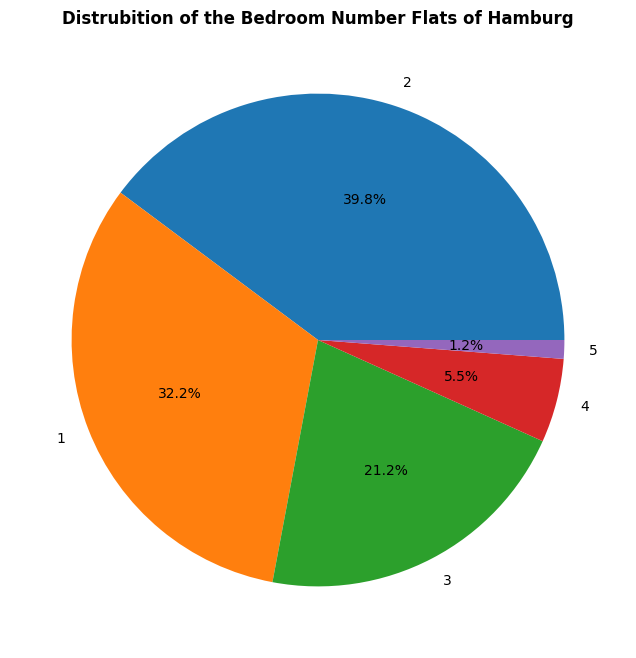

In [25]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Hamburg',weight="bold")

# display the chart
plt.show();


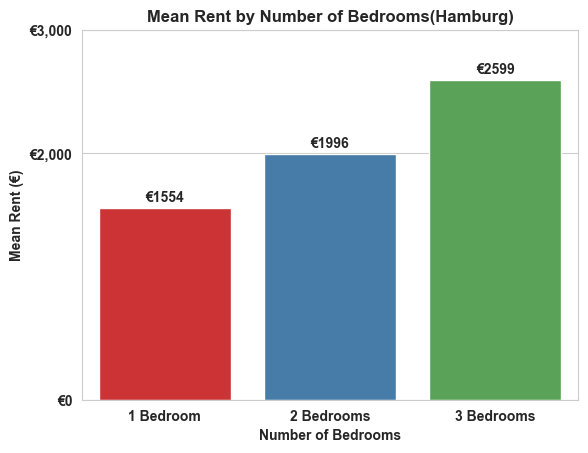

In [26]:
# Calculate mean rent for each group 
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Hamburg)', weight='bold')

plt.show();